In [1]:
# 라이브러리 추가
import pandas as pd
import seaborn as sns; sns.set(style='darkgrid', font='KoPub Dotum', font_scale=1.5)
import matplotlib.pyplot as plt

findfont: Font family ['KoPub Dotum'] not found. Falling back to DejaVu Sans.
findfont: Font family ['KoPub Dotum'] not found. Falling back to DejaVu Sans.


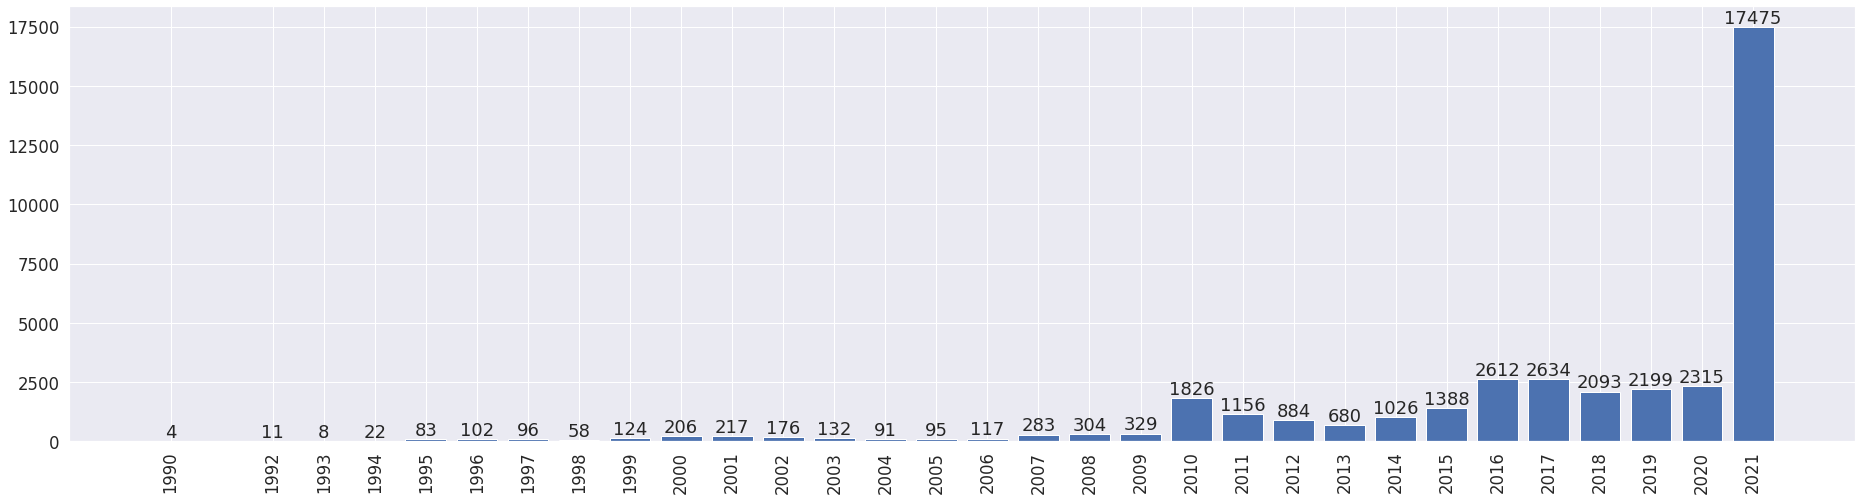

In [2]:
# 메타버스 기사건수
df = pd.read_excel('/Users/charles/textmining/bigkinds.xlsx', sheet_name='sheet', index_col='일자', parse_dates=True)
df1 = df.groupby(df.index.year).size()
f, ax = plt.subplots(figsize=(32, 8)); plt.xticks(df1.index, rotation=90)
plot = ax.bar(df1.index, df1.values)
for rect in plot:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha='center', va='bottom')
plt.savefig('/Users/charles/textmining/IMG01.png', bbox_inches='tight')

In [3]:
# 한나눔 불러오기
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [4]:
# 기사 제목
df[['제목']].to_csv('/Users/charles/textmining/bigkinds.txt', index=False, header=False)
f = open("/Users/charles/textmining/bigkinds.txt", 'r', encoding='UTF-8')
lines = f.readlines()
f.close()

In [5]:
# 단어빈도 분석
word = []
for i in range(len(lines)):
    word.append(hannanum.nouns(lines[i]))

def flatten(l):
    flatList = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

word_list = flatten(word)
word_list = pd.Series([x for x in word_list if len(x)>1])
word_list.value_counts().head(20)

메타버스    4873
증강현실    1766
개최      1513
기술      1049
출시       973
게임       949
디지털      874
미래       864
개발       844
플랫폼      794
시대       753
서비스      646
세계       635
기업       621
콘텐츠      604
공개       559
스마트폰     552
활용       551
국내       524
사업       518
dtype: int64

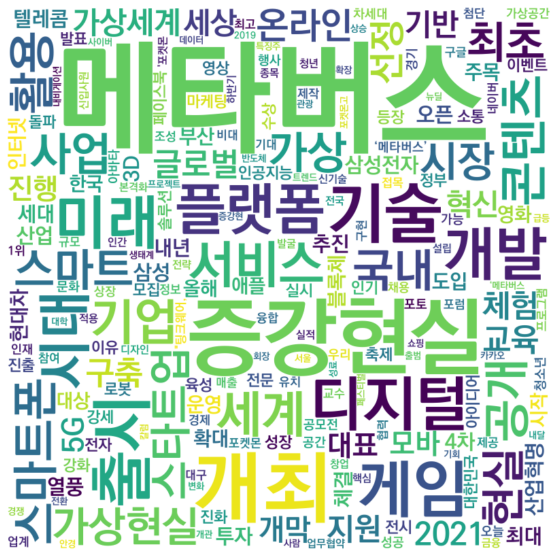

In [6]:
# 워드클라우드
from wordcloud import WordCloud
from collections import Counter

font_path = '/Users/charles/Library/Fonts/KoPub Dotum Bold.ttf'
wordcloud = WordCloud(font_path=font_path, width=800, height=800, background_color="white")

count = Counter(word_list)
wordcloud = wordcloud.generate_from_frequencies(count)
array = wordcloud.to_array()

fig = plt.figure(figsize=(10,10))
plt.imshow(array, interpolation="bilinear")
plt.axis("off")
plt.savefig('/Users/charles/textmining/IMG02.png', bbox_inches='tight')

<function matplotlib.pyplot.show(close=None, block=None)>

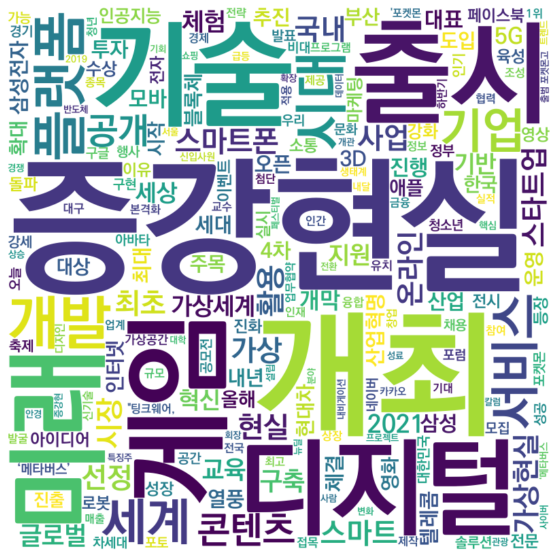

In [7]:
# 메타버스를 제외한 워드클라우드
count.pop("메타버스")
wordcloud = wordcloud.generate_from_frequencies(count)
array = wordcloud.to_array()

fig = plt.figure(figsize=(10,10))
plt.imshow(array, interpolation="bilinear")
plt.axis("off")
plt.savefig('/Users/charles/textmining/IMG03.png', bbox_inches='tight')
plt.show